In [44]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../')
from src.analysis.data_inspection import DataInspector, DataTypesInspectorStrategy, DataTypeVisualizationStrategy, DataSummaryInspectorStrategy
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

# The Data

The dataset was generated using [Wine Quality dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset). The task is to predict the right `Quality` which is an ordinal column.

Some key aspects are:

* Feature distributions are close to, but not exactly the same, as the original.
* We can use the original dataset as part of data augmentation.
* It is a fairly light dataset, so we can use lots of algorithms.
* The problem is framed as an ordinal regression, altough it can be framed as a classification problem.

Columns description [taken from this link](https://archive.ics.uci.edu/ml/datasets/wine+quality):

Number of Attributes: 11 + output attribute
Input variables (based on physicochemical tests):
- `fixed acidity` (tartaric acid - $g/dm^3$) most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- `volatile acidity` (acetic acid - $g/dm^3$) the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- `citric acid` ($g/dm^3$) found in small quantities, citric acid can add ‘freshness’ and flavor to wines
- `residual sugar` ($g/dm^3$) the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- `chlorides` (sodium chloride - $g/dm^3$) the amount of salt in the wine
- `free sulfur dioxide` ($mg/dm^3$) the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- `total sulfur dioxide` ($mg/dm^3$) amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- `density` ($g/cm^3$) the density of water is close to that of water depending on the percent alcohol and sugar content
- `pH` describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- `sulphates` (potassium sulphate - $g/dm^3$) a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- `alcohol` (% by volume) the percent alcohol content of the wine

Output variable (based on sensory data):
- quality (score between 0 and 10)

In [45]:
df = pd.read_csv('../data/raw/extracted/winequality-white.csv', sep=';')

In [46]:
df.shape

(4898, 12)

In [47]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Step 1: Data Inspection

In [48]:
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
# Initialiser l'inspecteur de données avec une stratégie pour l'inspection des types de données
data_inspector = DataInspector(DataTypesInspectorStrategy())
data_inspector.inspect(df)



Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None



Visualizing Data Types...


/home/herman/Documents/Career/ML_Project/End-to-end-ML-project-Design-pattern/notebook/../src/analysis/data_inspection.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Data Type", y="Count", data=type_counts, palette="viridis")


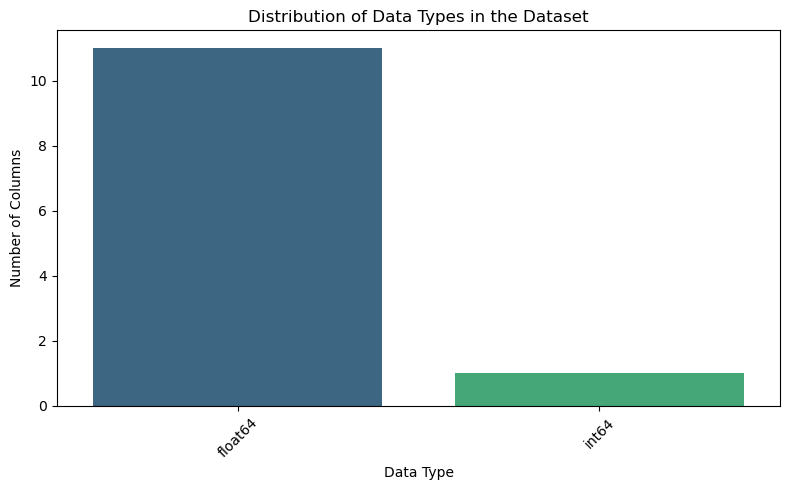

In [49]:
data_inspector.set_strategy(DataTypeVisualizationStrategy())
data_inspector.inspect(df)

In [50]:
# Summary Statistics Inspection
data_inspector.set_strategy(DataSummaryInspectorStrategy())
data_inspector.inspect(df)


Data Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.

# Step 2: Missing Values Analysis

In [51]:
from src.analysis.missing_values_analysis import SimpleMissingValuesAnalysis

In [52]:
missing = SimpleMissingValuesAnalysis()

In [53]:
missing.analyze(df)


 No missing values found.

 No missing values to visualize.


### Missing Values

**Insights**
- There are no null values

# Step 3: Univariate Analysis

In [54]:
from src.analysis.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis

In [55]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())


Analyzing numerical feature: density


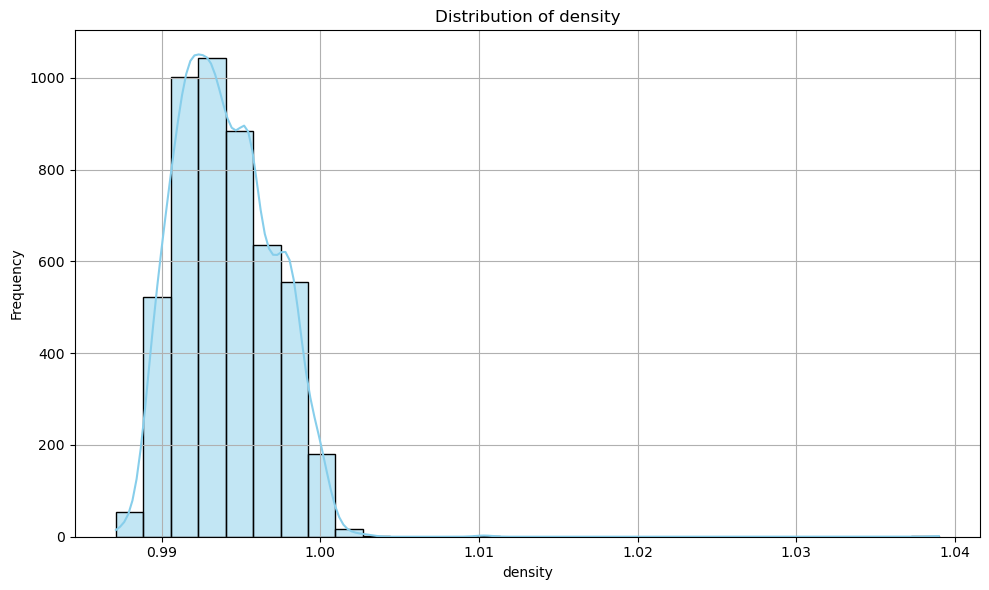

In [56]:
univariate_analyzer.execute_analysis(df, 'density')


--- Analyzing column: fixed acidity ---

Analyzing numerical feature: fixed acidity


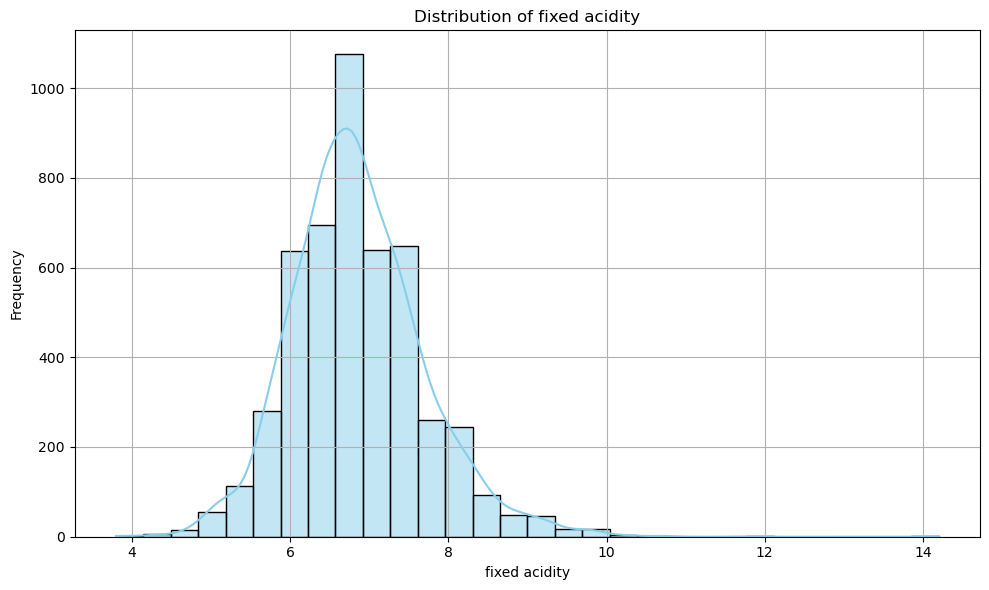

--- Finished analyzing column: fixed acidity ---

--- Analyzing column: volatile acidity ---

Analyzing numerical feature: volatile acidity


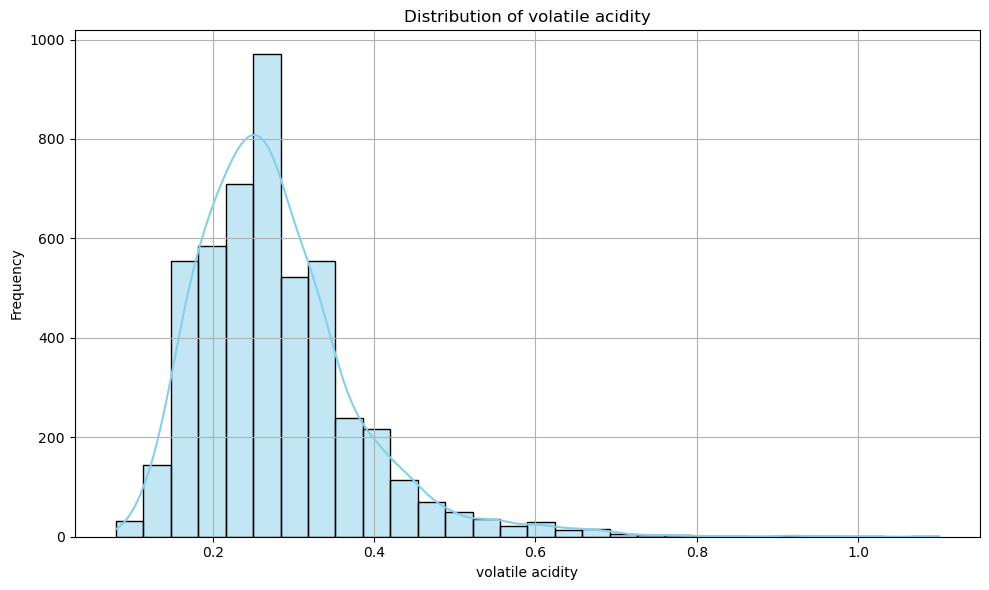

--- Finished analyzing column: volatile acidity ---

--- Analyzing column: citric acid ---

Analyzing numerical feature: citric acid


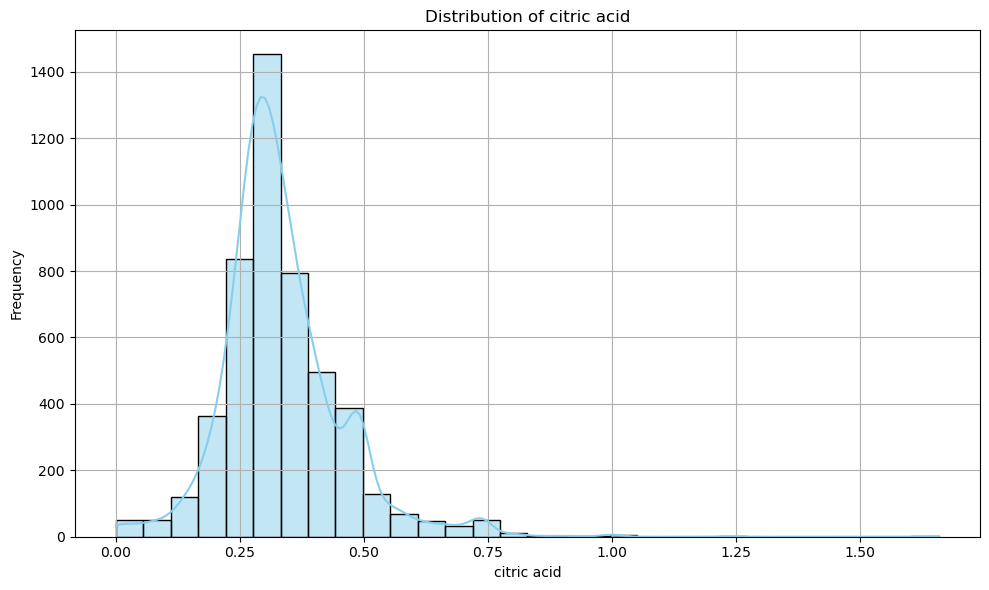

--- Finished analyzing column: citric acid ---

--- Analyzing column: residual sugar ---

Analyzing numerical feature: residual sugar


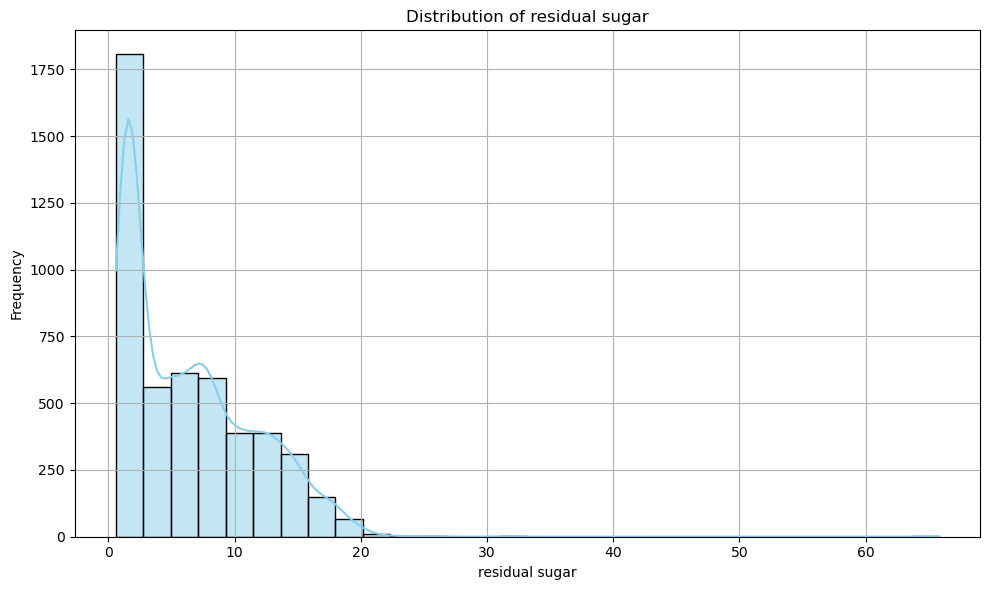

--- Finished analyzing column: residual sugar ---

--- Analyzing column: chlorides ---

Analyzing numerical feature: chlorides


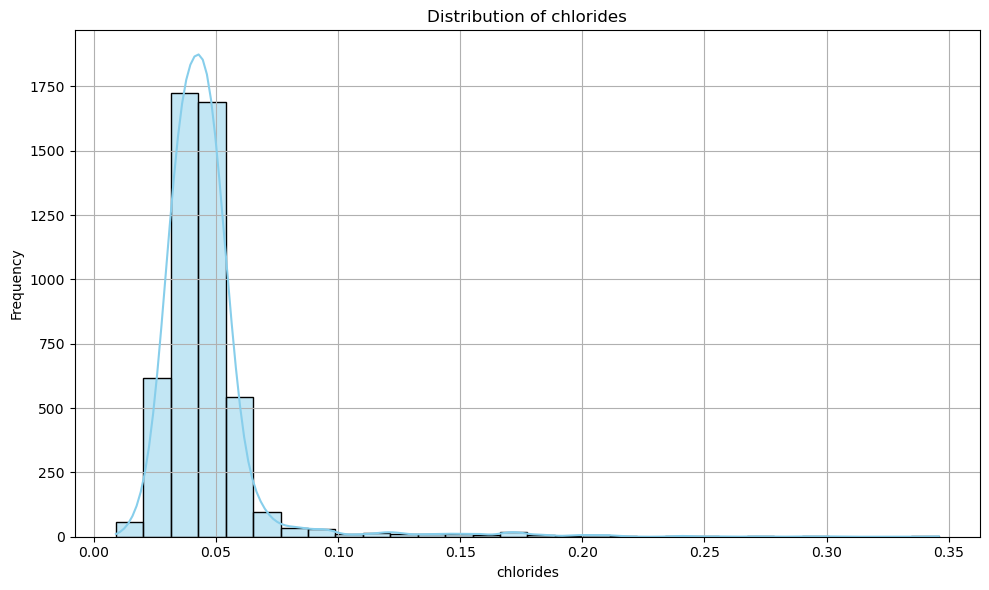

--- Finished analyzing column: chlorides ---

--- Analyzing column: free sulfur dioxide ---

Analyzing numerical feature: free sulfur dioxide


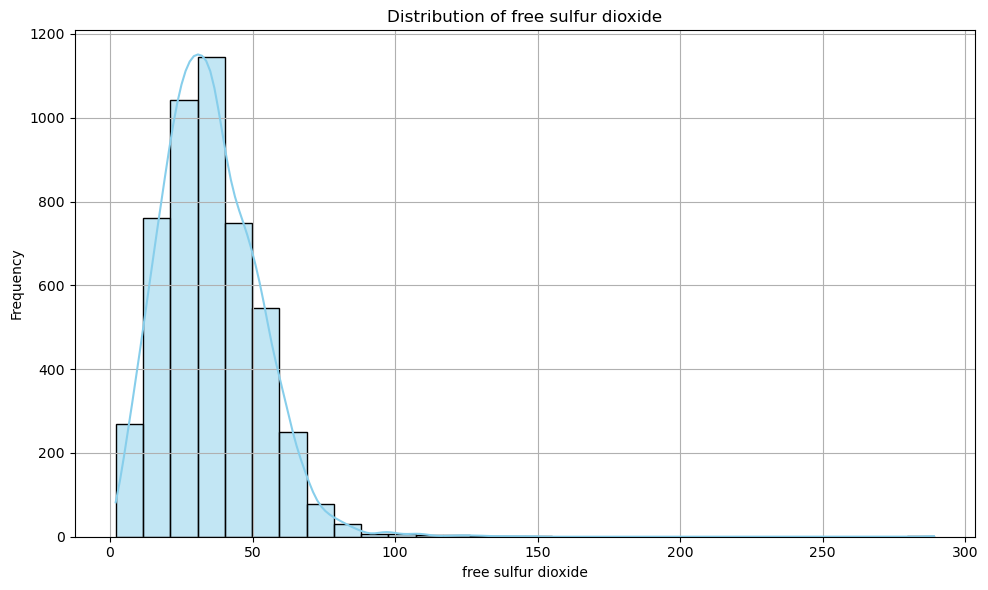

--- Finished analyzing column: free sulfur dioxide ---

--- Analyzing column: total sulfur dioxide ---

Analyzing numerical feature: total sulfur dioxide


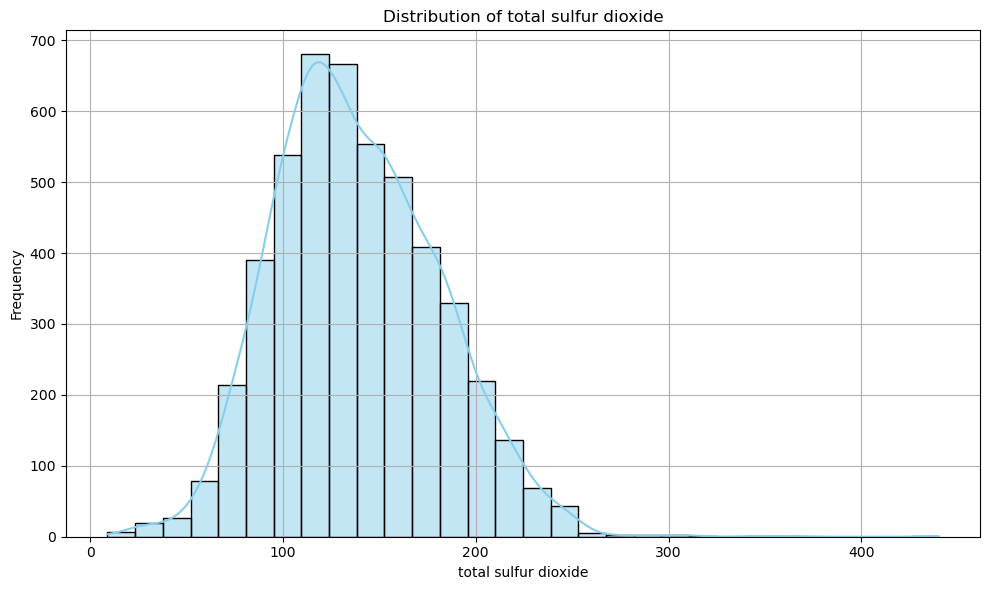

--- Finished analyzing column: total sulfur dioxide ---

--- Analyzing column: density ---

Analyzing numerical feature: density


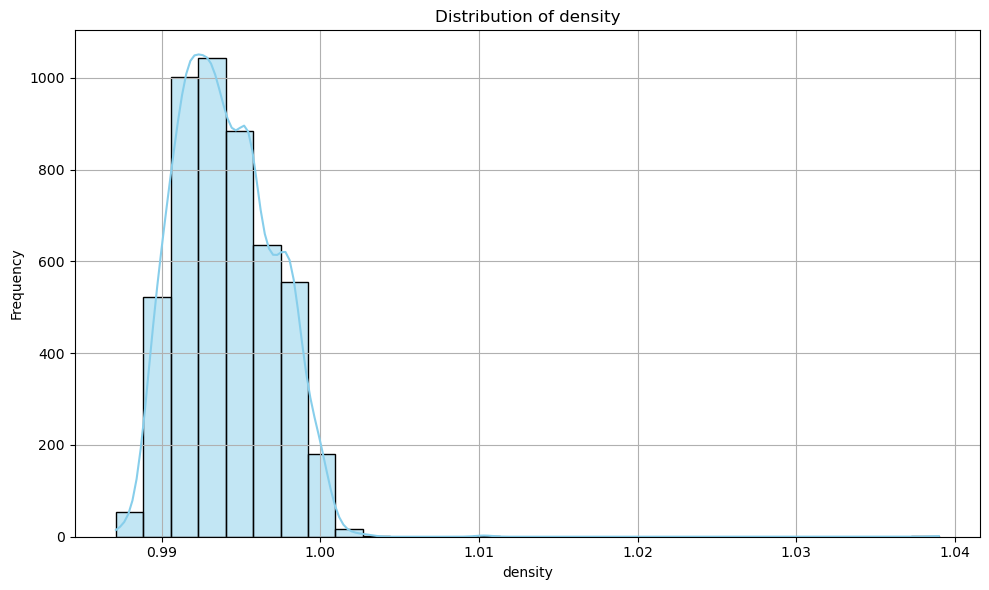

--- Finished analyzing column: density ---

--- Analyzing column: pH ---

Analyzing numerical feature: pH


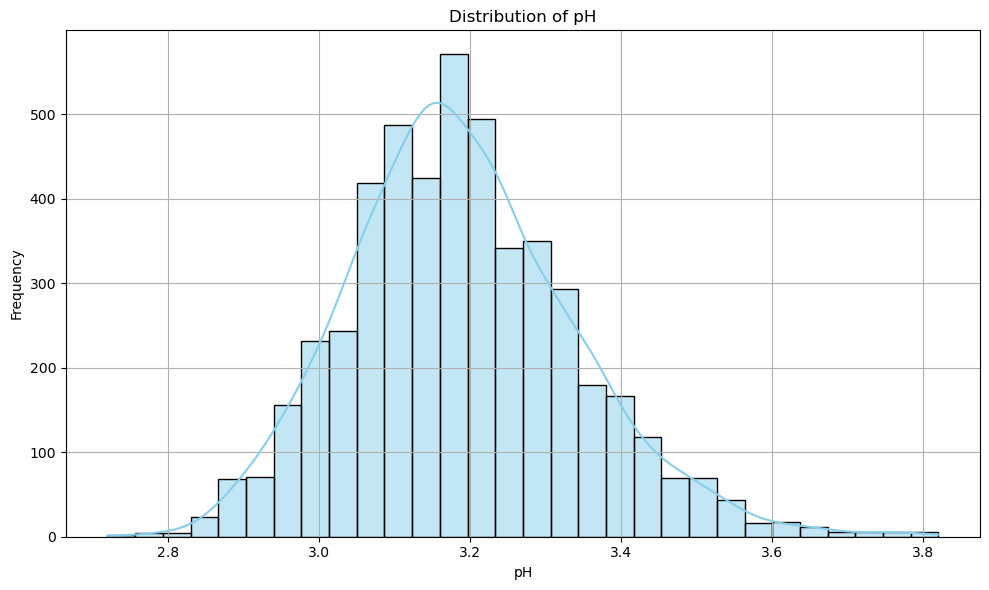

--- Finished analyzing column: pH ---

--- Analyzing column: sulphates ---

Analyzing numerical feature: sulphates


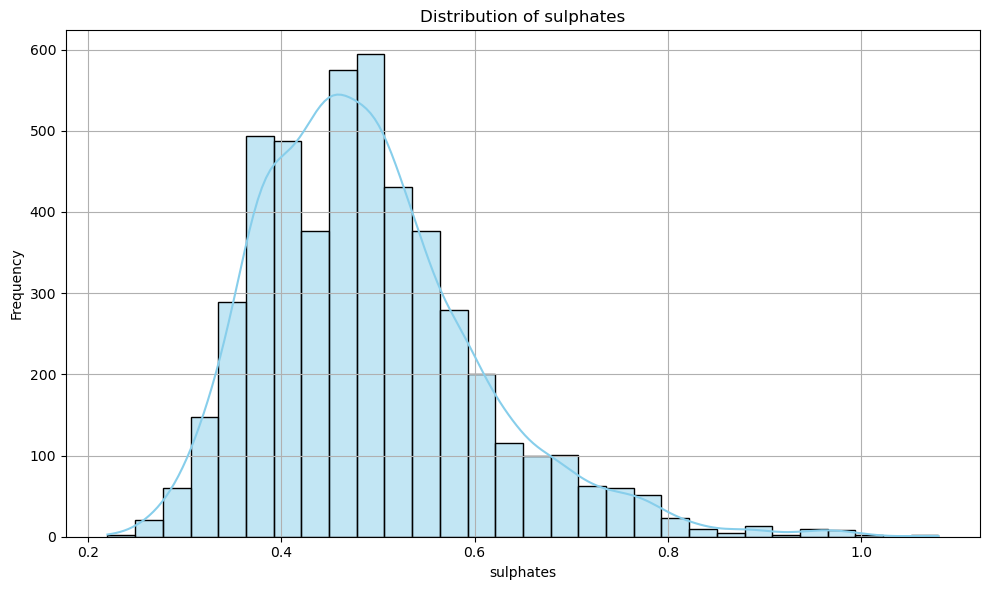

--- Finished analyzing column: sulphates ---

--- Analyzing column: alcohol ---

Analyzing numerical feature: alcohol


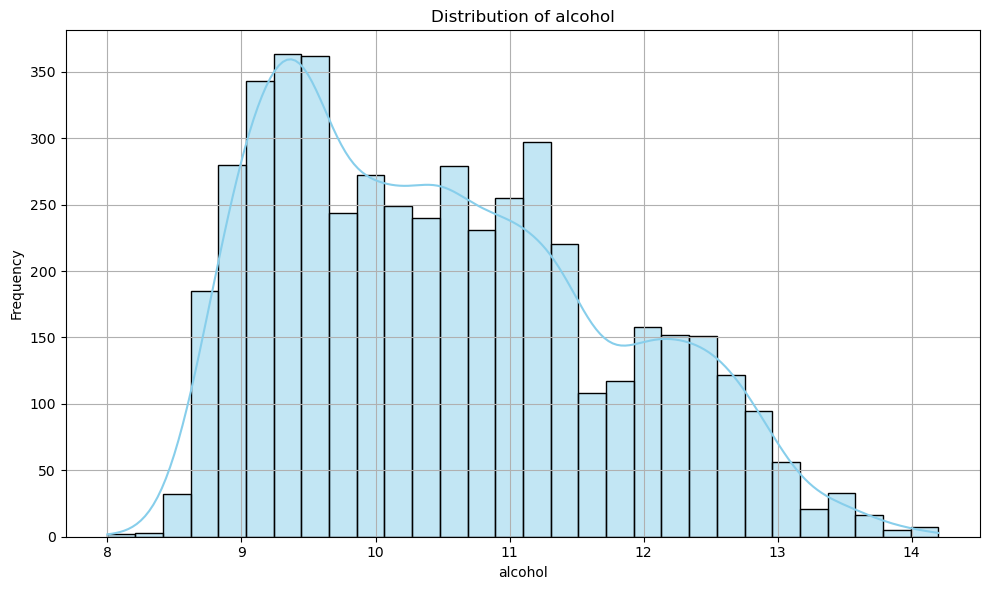

--- Finished analyzing column: alcohol ---

--- Analyzing column: quality ---

Analyzing numerical feature: quality


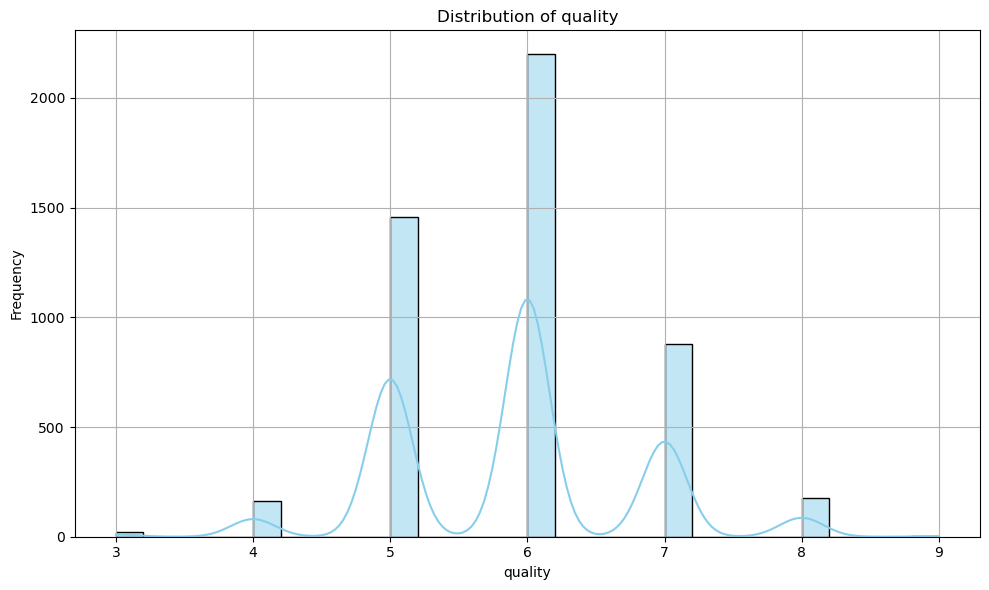

--- Finished analyzing column: quality ---


In [57]:
univariate_analyzer.analyze_all(df)

# Step 3: Bivariate Analysis